In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas_datareader as pdr

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
apple = pdr.get_data_yahoo('AAPL', '2002/01/01','2018/01/01')

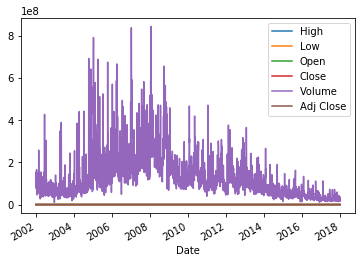

In [4]:
apple.plot()

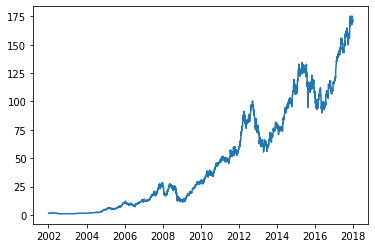

In [5]:
plt.plot(apple.Open)

In [6]:
df  = pdr.get_data_yahoo('AAPL', '2002/01/01','2018/01/01')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-02,1.664286,1.568571,1.575000,1.664286,132374200.0,1.440768
2002-01-03,1.696429,1.626429,1.642857,1.684286,153001800.0,1.458082
2002-01-04,1.710714,1.642143,1.667143,1.692143,102494000.0,1.464884
2002-01-07,1.714286,1.625000,1.694286,1.635714,111146000.0,1.416034
2002-01-08,1.646429,1.604286,1.625000,1.615000,112509600.0,1.398101


In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-22,175.419998,174.500000,174.679993,175.009995,16349400.0,169.009430
2017-12-26,171.470001,169.679993,170.800003,170.570007,33185500.0,164.721680
2017-12-27,170.779999,169.710007,170.100006,170.600006,21498200.0,164.750641
2017-12-28,171.850006,170.479996,171.000000,171.080002,16480200.0,165.214188
2017-12-29,170.589996,169.220001,170.520004,169.229996,25999900.0,163.427597


In [8]:
df_test = pdr.get_data_yahoo('AAPL', '2018/01/01','2020/01/01')
df_test.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.831299
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,288.442780
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,288.333313
2019-12-30,292.690002,285.220001,289.459991,291.519989,36028600.0,290.044617
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400.0,292.163818


In [9]:
apple_stock_open_train = df.iloc[:,1:2].values # train from 2016 to 2018
apple_stock_open_test = df_test.iloc[:,1:2].values # test only on 2019
apple_stock_open_train.shape, apple_stock_open_test.shape

((4028, 1), (503, 1))

In [10]:
#scaling between 0 and 1
normalized = MinMaxScaler()
train = normalized.fit_transform(apple_stock_open_train)
test = normalized.fit_transform(apple_stock_open_test)

In [11]:
def data_prep(df):
    feature_set = []
    labels = []

    for i in range (60, df.shape[0]):
        feature_set.append(df[i-60:i, 0])
        labels.append(df[i,0])
    return feature_set, labels

In [12]:
feature_set, labels = data_prep(train)

In [13]:
feature_set = np.array(feature_set)

In [14]:
labels = np.array(labels)

In [15]:
feature_set.shape, labels.shape

((3968, 60), (3968,))

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [17]:
test = np.reshape(test, (test.shape[0],test.shape[1],1))

In [18]:
test.shape

(503, 1, 1)

In [19]:
#feature_set = np.reshape(feature_set, (feature_set.shape[0],feature_set.shape[1],1))
feature_set = np.expand_dims(feature_set,-1)

In [20]:
feature_set.shape

(3968, 60, 1)

In [21]:
model = Sequential()
model.add(LSTM(5, return_sequences=True, input_shape = (feature_set.shape[1],1)))
model.add(Dropout(0.2)) #turns off 20% of neurons in order to prevent overfitting
model.add(LSTM(5, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dropout(0.2))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 5)             140       
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 5)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 5)             220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 5)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                640       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total para

In [24]:
history = model.fit(feature_set, labels, epochs=30, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
3968/3968 [==============================] - 16s 4ms/step - loss: 0.0343
Epoch 2/30
3968/3968 [==============================] - 13s 3ms/step - loss: 0.0084
Epoch 3/30
3968/3968 [==============================] - 13s 3ms/step - loss: 0.0068
Epoch 4/30
3968/3968 [==============================] - 11s 3ms/step - loss: 0.0058
Epoch 5/30
3968/3968 [==============================] - 11s 3ms/step - loss: 0.0046
Epoch 6/30
3968/3968 [==============================] - 12s 3ms/step - loss: 0.0043
Epoch 7/30
3968/3968 [==============================] - 11s 3ms/step - loss: 0.0033
Epoch 8/30
3968/3968 [==============================] - 14s 4ms/step - loss: 0.0034:
Epoch 9/30
3968/3968 [==============================] - 11s 3ms/step - loss: 0.0032
Epoch 10/30
3968/3968 [==============================] - 12s 3ms/step - loss: 0.0029
Epoch 11/30
3968/3968 [==============================] - 15s 4ms/step - loss: 0.0030
Epoch 12/30
3968/3968 [==

In [25]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 3968,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss']}

In [26]:
feature_set_test, labels_test = data_prep(test)

In [27]:
feature_set_test = np.array(feature_set_test)

In [28]:
labels_test = np.array(labels_test)

In [29]:
pred = model.predict(feature_set_test, verbose=0)

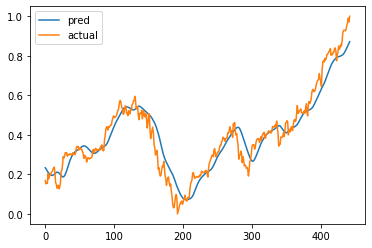

In [30]:
plt.plot(pred, label='pred')
plt.plot(labels_test, label='actual')
plt.legend();